In [ ]:
Video-Games Sales Analysis : Python Project Spring 2017
Group: OMEGA
Members : [[Prathamesh Palande],
          [Gerald Baretto],
          [Himanshu Shailendra],
          [Bhavesh Bendale],
          [Nupur Chhabra]]

In [ ]:
Display Image using a weblink - WIKIMEDIA

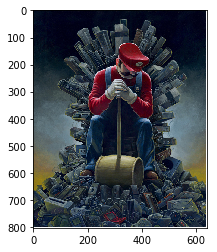

In [1]:
% matplotlib inline
# these are coming from scikit modules
from skimage.io import imread
from skimage.transform import resize 

from matplotlib import pyplot as plt
import matplotlib.cm as cm

example_file = ("https://upload.wikimedia.org/wikipedia/commons/3/35/Throne.png") 
image = imread(example_file)
#image = imread("/Users/himansh/Documents/GSU/Spring/CIS8005/Project/dataset/Throne.png")
plt.imshow(image)
plt.show()

In [53]:
#Steps:
    #Download firefox,if you dont have it.
    #Download the Add-ons for firefox.
    #Open SQLite manager
    #Create a new Database
    #Write the query to create table and Run the Query
    #Write the query to insert values and Run the INSERT query
    #Go to Jupyter notebook and open a new connection to your database
    
    #for example 
    #import sqlite3
    #import pandas as pd
    #vconn = sqlite3.connect('C:\Users\Nupur Chhabra\Documents\MSIS\data programming-python\project\project_videogames.sqlite')
    #================================
    #Once you create a connection,to put the value in dataframe we run the statement as shown below:
    #df_vg = pd.read_sql_query("SELECT * FROM Videogames", conn)
    #=================================
    #After the dataframe is created we can run SQL queries
    
    #================================
    #If you dont put it in dataframe,the ouput of the data comes as a list in unicode format
    #cur = conn.cursor()

    #for row in cur.execute('SELECT * FROM videogames;'):
    #print(row)


In [2]:
import sqlite3
import pandas as pd

%matplotlib inline
from matplotlib.pyplot import hist
conn = sqlite3.connect('/Users/himansh/Documents/workspace/PythonProject/python_project.sqlite')

df_vg = pd.read_sql_query("SELECT * FROM videogames", conn)
ratings = pd.read_sql_query("SELECT * FROM rating_data", conn)

In [3]:
df_vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,None,NaN,None,None
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,None,NaN,None,None


In [6]:
ratings.head()

,Game,Platform,Score,Genre
0,Wolfenstein: The New Order,Xbox One,7.8,Shooter
1,Mario Kart 8,Wii U,9.0,"Racing, Action"
2,Sportsfriends,PlayStation 3,8.7,"Action, Compilation"
3,Sportsfriends,PlayStation 4,8.7,"Action, Compilation"
4,Sportsfriends,PC,8.7,"Action, Compilation"


In [ ]:
# Data Cleaning - We are using two datasets : 
#    1) Global Sales data for VideoGames (KAGGLE)
#    Sales data contains data for video games sales in different regions. First, on analyzing the dataset we  
#    noticed a lot of ratings data as missing. Also, we could see redundant data for year > 2016 which could be dummy data.

#    2) Ratings data (Imagine Games Network(IGN))
#    We are analyzing another dataset from IGN providing Ratings for all the video games over the world. 

# SELECTION : To work on the correct data we are merging the two datasets to achieve a uniform dataset or target data
#            once we start analyzing the global sales data.
# PRE-PROCESSING : Removing null and N/A values from columns such as Year_Of_Release and Ratings helps in analyzing the 
#                patterns without redundant or incorrect data.
# TRANSFORMATION : Transformed dataset "cleaned_df_vg" and "df_vg_yr" will be used to analyze different graphs and 
#                patterns.

In [7]:
new_rating = []
for game in df_vg['Name']:
    value = ratings[ratings['Game'] == game]
    if value.shape[0] > 0:
        new_rating.append(value['Score'].iloc[0])
    else:
        new_rating.append(0)
print(new_rating[0:10])

[7.5, 9.0, 8.5, 7.7000000000000002, 0, 9.0, 9.5, 0, 8.9000000000000004, 0]


In [ ]:
#Introducing a new column "IGN" to be included in sales dataframe. In the below code - replacing the "0" values with
#NAN values

In [8]:
import numpy as np
df_vg['IGN'] = new_rating
df_vg['IGN'] = df_vg['IGN'].replace(0, np.NaN)

In [9]:
rating_columns = ['IGN', 'User_Score', 'Critic_Score']
df_vg[pd.isnull(df_vg['User_Score'])].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,None,NaN,None,None,9.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,None,NaN,None,None,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,None,NaN,None,None,9.0
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,None,NaN,None,None,NaN
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,None,NaN,None,None,NaN


In [ ]:
#Populating clean dataset"cleaned_df_vg" with IGN column in GlobalSales data for VideoGames "df_vg" with no Null values

In [13]:
cleaned_df_vg = df_vg
for col in rating_columns:
    cleaned_df_vg = cleaned_df_vg[pd.notnull(cleaned_df_vg[col])]
cleaned_df_vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,7.5
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.5
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,7.7
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9.5
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,8.9


In [11]:
cleaned_df_vg = cleaned_df_vg.reset_index()
cleaned_df_vg.to_csv("/Users/himansh/Documents/GSU/Spring/CIS8005/Project/dataset/cleaned_game1.csv")

In [ ]:
# Cleaned data set contains 6000 rows so creating another dataset which has data for year <= 2016 and no null values 
# for year_of_Release

In [14]:
df_vg_yr = df_vg[df_vg.Year_of_Release != 'N/A']
df_vg_yr = df_vg_yr[df_vg_yr.Year_of_Release <= 2016]
df_vg_yr

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,7.5
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,None,NaN,None,None,9.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.5
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,7.7
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,None,NaN,None,None,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,None,NaN,None,None,9.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9.5
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,NaN
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,8.9
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,None,NaN,None,None,NaN


In [ ]:
# The corresponding graph represents the Sales of video games based on the platform.
# We can see which platform game is sold the most and produces the highest revenue.
# This can help a developer to decide which platform is most widely used 
# and can create most no of sales and profit also in which region.

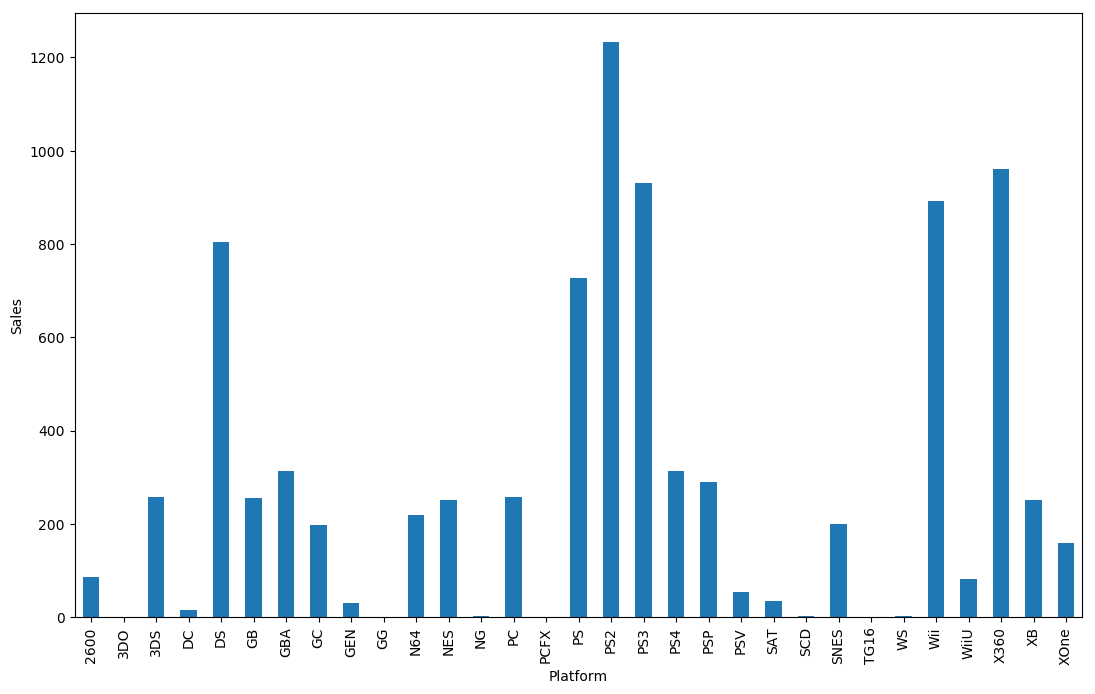

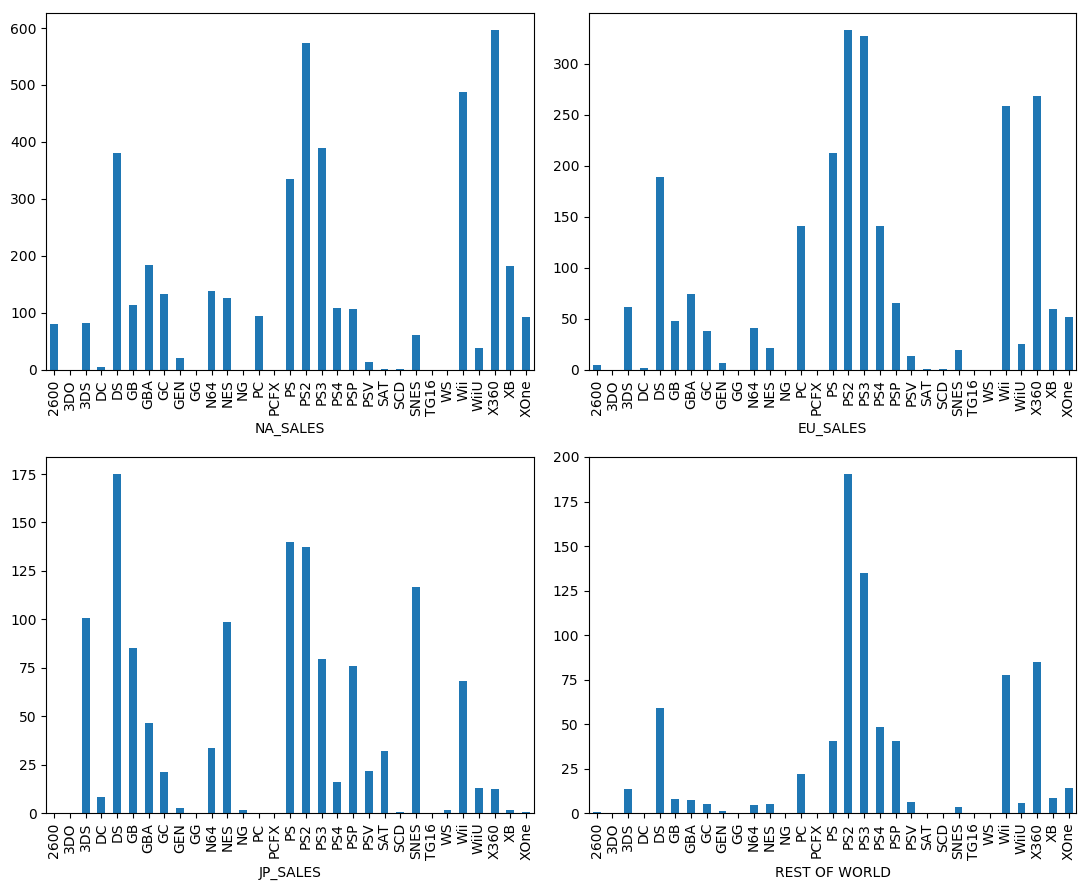

In [15]:
from matplotlib.pyplot import hist

import matplotlib.pyplot as plt

%matplotlib inline

fig=plt.figure(figsize=(13, 8), dpi= 100, facecolor='w')
a=df_vg_yr.groupby('Platform').agg(sum)['Global_Sales'].plot.bar()
a.set_xlabel('Platform',size=10)
a.set_ylabel('Sales',size=10)

fig=plt.figure(figsize=(11, 9), dpi= 100, facecolor='w')
sub1 = plt.subplot(2, 2, 1)
sub1=df_vg_yr.groupby('Platform').agg(sum)['NA_Sales'].plot.bar()
sub1.set_xlabel('NA_SALES',size=10)

sub2 = plt.subplot(2, 2, 2)
sub2=df_vg_yr.groupby('Platform').agg(sum)['EU_Sales'].plot.bar()
sub2.set_xlabel('EU_SALES',size=10)

sub3 = plt.subplot(2, 2, 3)
sub3=df_vg_yr.groupby('Platform').agg(sum)['JP_Sales'].plot.bar()
sub3.set_xlabel('JP_SALES',size=10)

sub4 = plt.subplot(2, 2, 4)
sub4=df_vg_yr.groupby('Platform').agg(sum)['Other_Sales'].plot.bar()
sub4.set_xlabel('REST OF WORLD',size=10)

fig.tight_layout()
plt.show()



In [ ]:
# Below graph displays the Sales of video Games in the corresponding year.
# This shows in which year was the highest sales and video game sales were a boom.

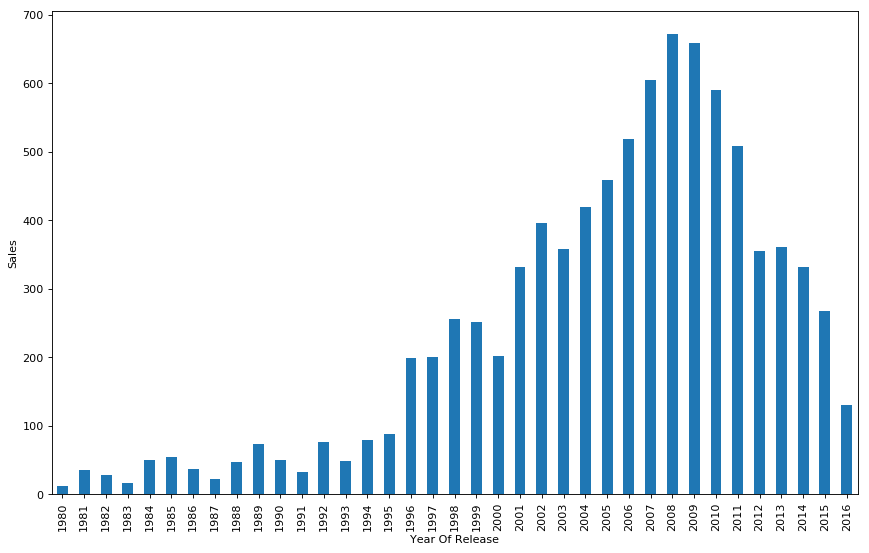

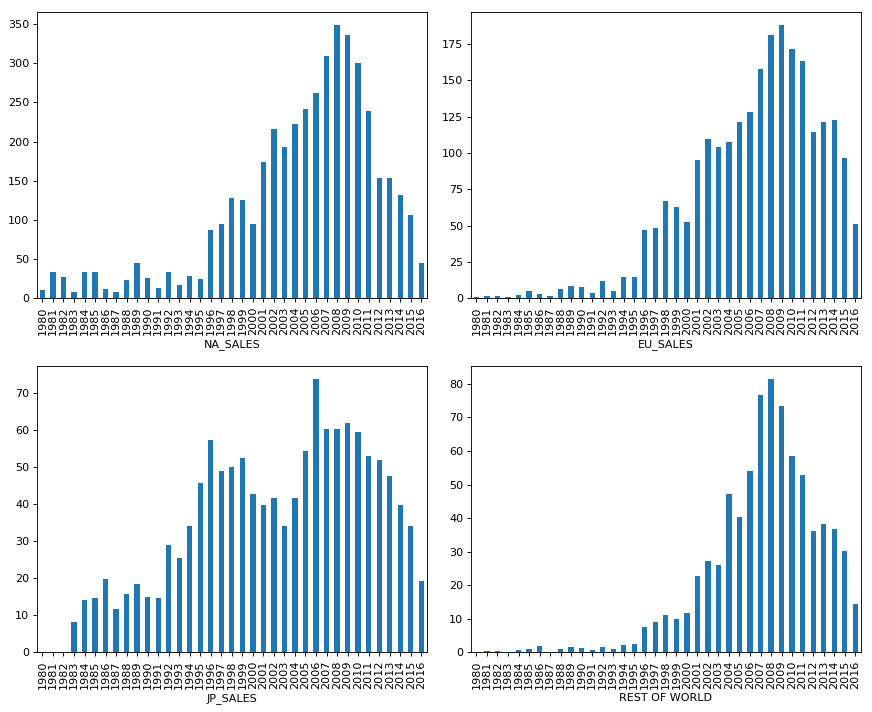

In [16]:
from matplotlib.pyplot import hist

import matplotlib.pyplot as plt

%matplotlib inline

fig=plt.figure(figsize=(13, 8), dpi= 80, facecolor='w')
a=df_vg_yr.groupby('Year_of_Release').agg(sum)['Global_Sales'].plot.bar()
a.set_xlabel('Year Of Release',size=10)
a.set_ylabel('Sales',size=10)

fig=plt.figure(figsize=(11, 9), dpi= 80, facecolor='w')
sub1 = plt.subplot(2, 2, 1)
sub1=df_vg_yr.groupby('Year_of_Release').agg(sum)['NA_Sales'].plot.bar()
sub1.set_xlabel('NA_SALES',size=10)

sub2 = plt.subplot(2, 2, 2)
sub2=df_vg_yr.groupby('Year_of_Release').agg(sum)['EU_Sales'].plot.bar()
sub2.set_xlabel('EU_SALES',size=10)

sub3 = plt.subplot(2, 2, 3)
sub3=df_vg_yr.groupby('Year_of_Release').agg(sum)['JP_Sales'].plot.bar()
sub3.set_xlabel('JP_SALES',size=10)

sub4 = plt.subplot(2, 2, 4)
sub4=df_vg_yr.groupby('Year_of_Release').agg(sum)['Other_Sales'].plot.bar()
sub4.set_xlabel('REST OF WORLD',size=10)
fig.tight_layout()
plt.show()

In [ ]:
# Following Pie Charts show 5 highest earning games, throughout the entire timeline.
# This chart can help us to decide which games prequels should be released and also in which region.

/Users/himansh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/himansh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/himansh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/himansh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/himansh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


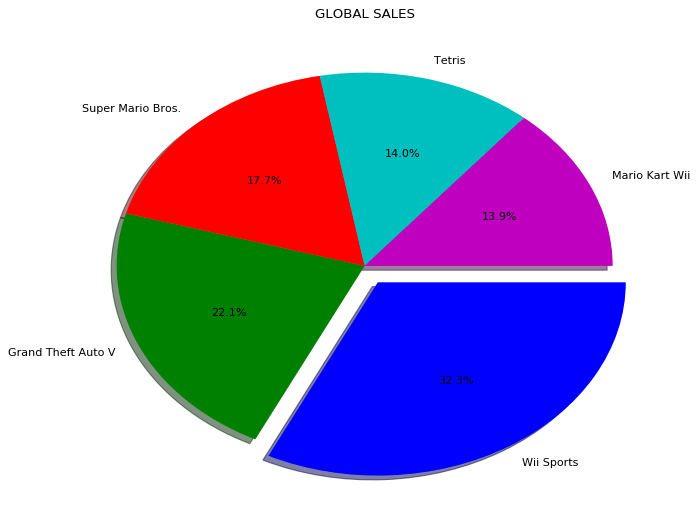

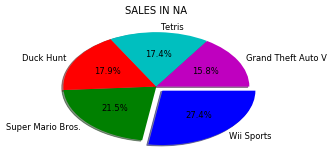

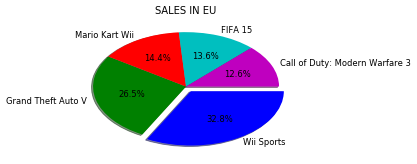

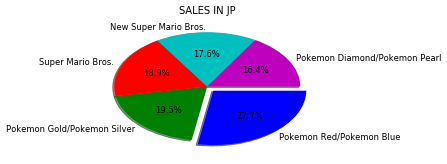

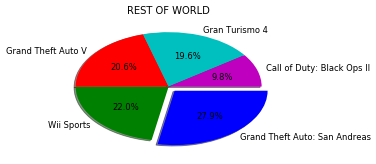

In [17]:
import matplotlib.pyplot as plt



# the portion you want to dedicate to each value

# for example for first one is 5 out of 43 makes it %11.6

result0 = pd.DataFrame(df_vg_yr.groupby(['Name'], as_index = False).agg({'Global_Sales':sum}).sort('Global_Sales', ascending=False))[0:5]
result1 = pd.DataFrame(df_vg_yr.groupby(['Name'], as_index = False).agg({'NA_Sales':sum}).sort('NA_Sales', ascending=False))[0:5]
result2 = pd.DataFrame(df_vg_yr.groupby(['Name'], as_index = False).agg({'EU_Sales':sum}).sort('EU_Sales', ascending=False))[0:5]
result3 = pd.DataFrame(df_vg_yr.groupby(['Name'], as_index = False).agg({'JP_Sales':sum}).sort('JP_Sales', ascending=False))[0:5]
result4 = pd.DataFrame(df_vg_yr.groupby(['Name'], as_index = False).agg({'Other_Sales':sum}).sort('Other_Sales', ascending=False))[0:5]

values0 = [float(i) for i in result0.Global_Sales]
values1 = [float(i) for i in result1.NA_Sales]
values2 = [float(i) for i in result2.EU_Sales]
values3 = [float(i) for i in result3.JP_Sales]
values4 = [float(i) for i in result4.Other_Sales]

values=[values0,values1,values2,values3,values4]
colors = ['b', 'g', 'r', 'c', 'm']
labels0 = [str(i) for i in result0.Name]
labels1 = [str(i) for i in result1.Name]
labels2 = [str(i) for i in result2.Name]
labels3 = [str(i) for i in result3.Name]
labels4 = [str(i) for i in result4.Name]

labels=[labels0,labels1,labels2,labels3,labels4]
title=['GLOBAL SALES','SALES IN NA','SALES IN EU','SALES IN JP','REST OF WORLD']

# move the second value section out of the chart. The higher the number the farther it gets moved

explode = (0.1, 0, 0, 0, 0)

for i in range(0,5):

# autopct the %.1f is Python formating and %% used to show as percent
    plt.figure(i)
    if(i==0):
        fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w')
    else:
        fig=plt.figure(figsize=(5, 3), dpi= 60, facecolor='w')

    plt.pie(values[i], colors=colors, labels=labels[i], 
            explode=explode, autopct='%.1f%%',
            counterclock=False, shadow=True)

    plt.title(title[i])


plt.show()

In [18]:
#Bhavesh Graphs
#Rating vs No of Games
dfsub = df_vg_yr[df_vg_yr.Rating.notnull()]
dfsub.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,7.5
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.5
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,7.7
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9.5
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,NaN


In [37]:
dfsub.groupby(df_vg_yr['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
Rating,,,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3921,3921,3921,3921,3921,3921,3921,3921,3921,3921,2756,2756,3886,2338,3921,3921,2445
E10+,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393,1097,1097,1386,1026,1393,1393,851
EC,8,8,8,8,8,8,8,8,8,8,0,0,8,1,8,8,2
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3,1
M,1536,1536,1536,1536,1536,1536,1536,1536,1536,1536,1457,1457,1534,1492,1536,1536,1085
RP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
T,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2589,2589,2887,2518,2905,2905,1907


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use boolean mask, but use logical_not to invert it
mask = np.logical_not(dfsub['Rating'].isin(['AO','EC','K-A', 'RP']))
# filter out those unwanted games
dfsub = dfsub[mask]
dfsub['Rating'].unique()

array([u'E', u'M', u'T', u'E10+'], dtype=object)

In [39]:
df_group = dfsub[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(dfsub['Rating']).sum()
df_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
E,1274.24,703.87,197.96,2408.67,231.54
E10+,345.50,183.35,40.20,641.20,71.93
M,742.89,480.00,63.58,1462.60,176.06
T,747.60,421.79,150.70,1474.13,152.99


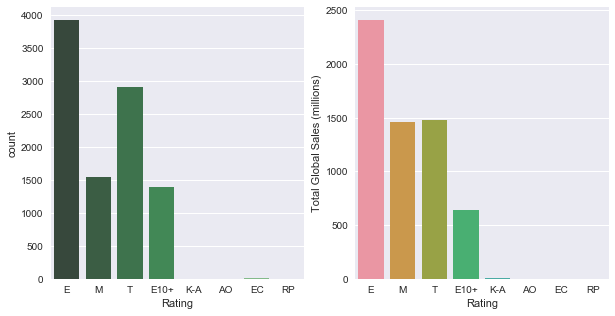

In [19]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=dfsub, palette="Greens_d", ax=ax1)
ax1.set_ylabel("Number of Games")
sns.countplot(x="Rating", data=dfsub, palette="Greens_d", ax=ax1)
sns.barplot(x="Rating", y="Global_Sales",data=dfsub, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales (millions)")

In [20]:
dfcleanedsub = cleaned_df_vg[cleaned_df_vg.IGN.notnull()]
dfcleanedsub.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,7.5
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.5
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,7.7
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9.5
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,8.9


In [42]:
dfcleanedsub.groupby(cleaned_df_vg['IGN']).count()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,IGN
IGN,,,,,,,,,,,,,,,,,,
1.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1.1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2
1.5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1.9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,17,29,29,29
2.1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4
2.2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [43]:
df_cleaned_group = dfcleanedsub[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(dfcleanedsub['IGN']).sum()
df_cleaned_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
IGN,,,,,
1.0,0.12,0.03,0.00,0.16,0.01
1.1,0.16,0.05,0.00,0.22,0.01
1.2,0.04,0.00,0.00,0.04,0.00
1.5,0.27,0.02,0.00,0.32,0.03
1.9,0.16,0.04,0.00,0.22,0.01
2.0,5.94,3.77,0.03,10.78,1.00
2.1,0.38,0.07,0.00,0.49,0.04
2.2,0.20,0.00,0.00,0.22,0.02
2.3,0.02,0.01,0.00,0.02,0.00


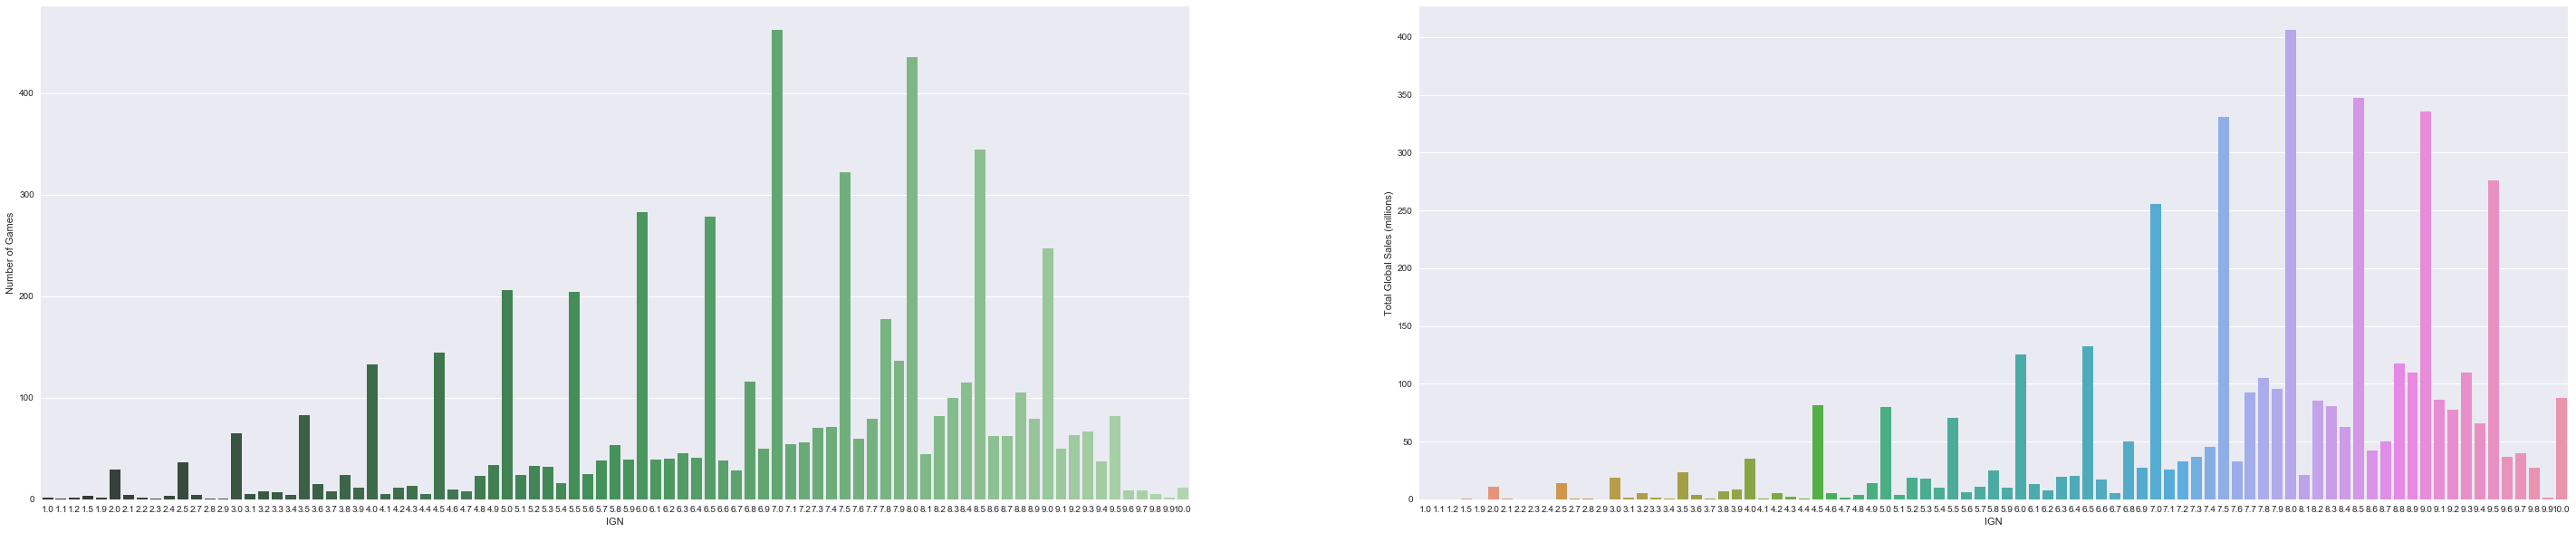

In [21]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1,2, figsize=(50,10))

sns.countplot(x="IGN", data=dfcleanedsub, palette="Greens_d", ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="IGN", y="Global_Sales",data=dfcleanedsub, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales (millions)")

In [ ]:
# Number of Games by Genre 

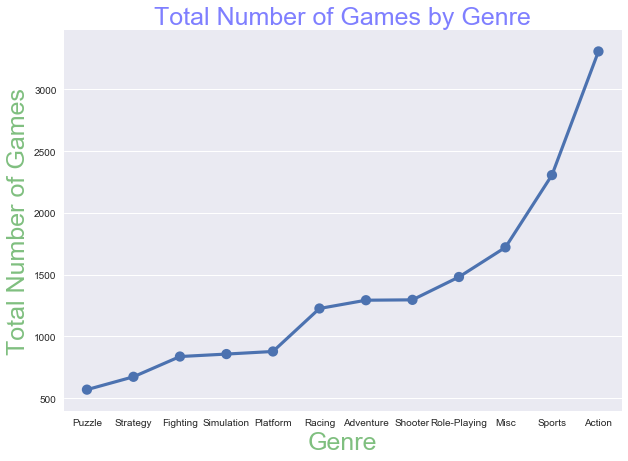

In [22]:
games_by_genre = df_vg_yr.groupby('Genre').agg({'Genre':len}).sort_values('Genre')
plt.subplots(figsize=(10,7))
ax = sns.pointplot(x=games_by_genre.index, y=games_by_genre.Genre)
ax.set_title('Total Number of Games by Genre', color='blue', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=25, alpha=0.5)
ax.set_ylabel('Total Number of Games', color='green', size=25, alpha=0.5)

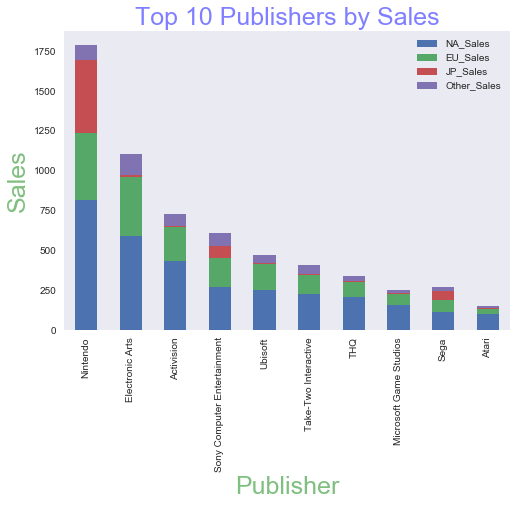

In [23]:
#Nupur Graphs

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

global_sales_publisher = df_vg_yr.pivot_table(index=['Publisher'], values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                           aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)
plt.show()

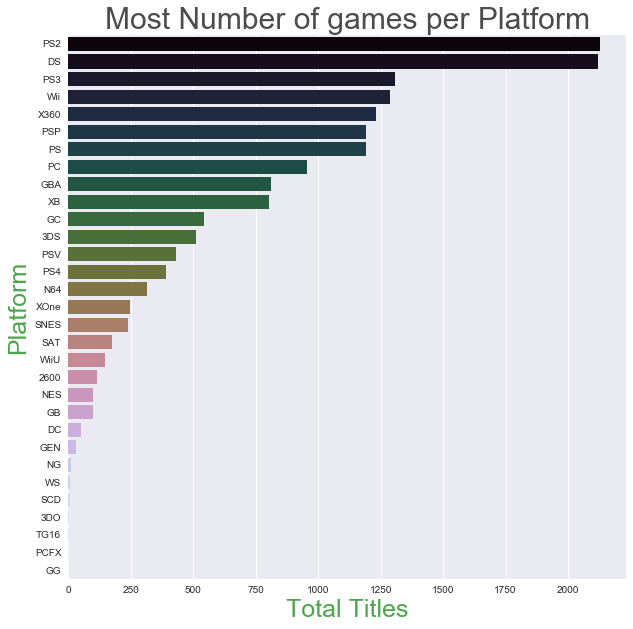

In [24]:
platform_name = df_vg_yr.Platform.value_counts()

plt.subplots(figsize=(10,10))
ax = sns.barplot(x=platform_name , y=platform_name .index, palette='cubehelix')
ax.set_title('Most Number of games per Platform', color='black', alpha=0.7, size=30)
ax.set_xlabel('Total Titles', color='green', alpha=0.7, size=25)
ax.set_ylabel('Platform', color='green', alpha=0.7, size=25)

plt.show()

In [ ]:
The below graph contains data regarding the sales of games belonging to various genre.
This graph can be used to gather information about the popularity of games belonging to a genre.

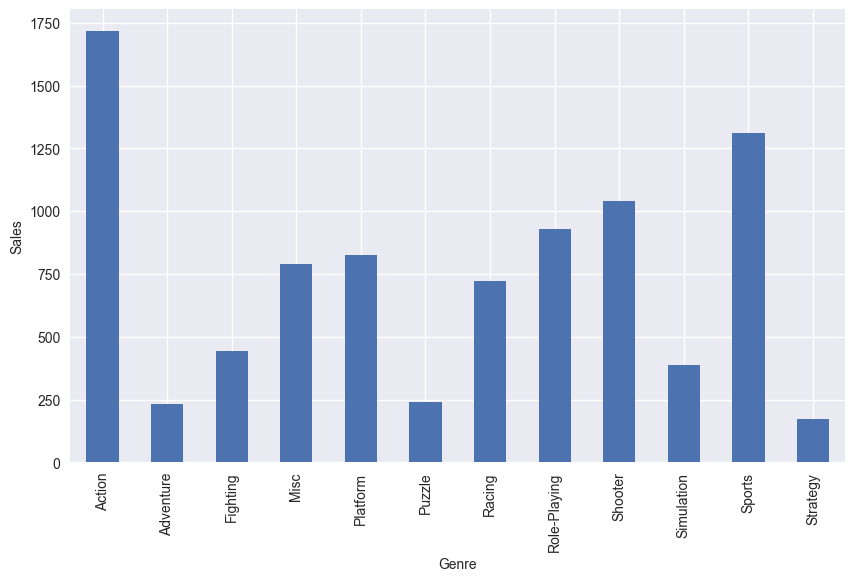

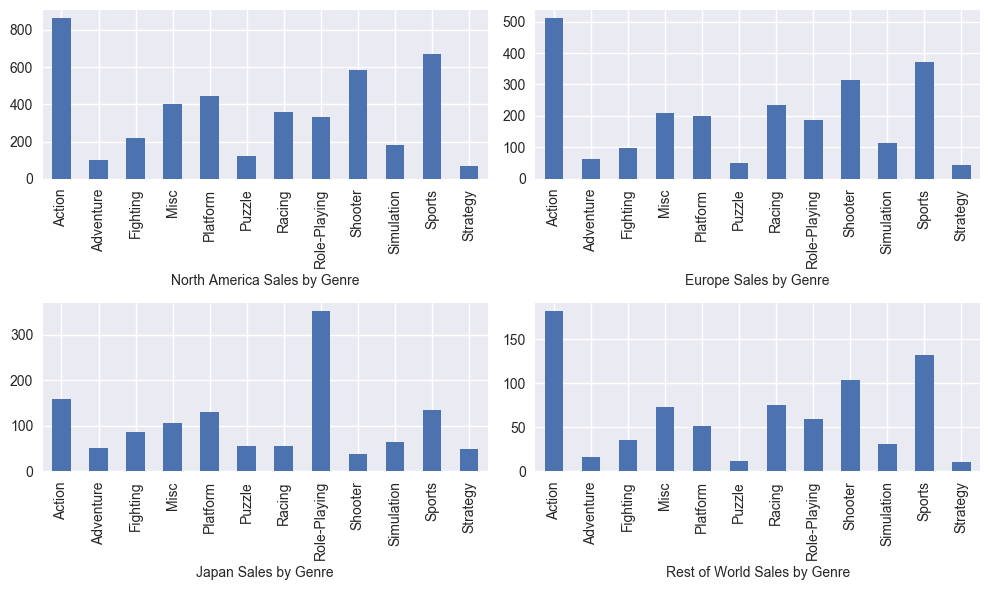

In [25]:
import pandas as pd
%matplotlib inline
from matplotlib.pyplot import hist

#Displays the primary graph containg sales data for all the genres
fig=plt.figure(figsize=(10, 6), dpi= 100, facecolor='w')
a=df_vg_yr.groupby('Genre').agg(sum)['Global_Sales'].plot.bar()
a.set_xlabel('Genre',size=10)
a.set_ylabel('Sales',size=10)

#filtering records based on region to know the regional sales of games belonging to a particular genre
fig=plt.figure(figsize=(10, 6), dpi= 100, facecolor='w')
sub1 = plt.subplot(2, 2, 1)
sub1=df_vg_yr.groupby('Genre').agg(sum)['NA_Sales'].plot.bar()
sub1.set_xlabel('North America Sales by Genre',size=10)

sub2 = plt.subplot(2, 2, 2)
sub2=df_vg_yr.groupby('Genre').agg(sum)['EU_Sales'].plot.bar()
sub2.set_xlabel('Europe Sales by Genre',size=10)


sub3 = plt.subplot(2, 2, 3)
sub3=df_vg_yr.groupby('Genre').agg(sum)['JP_Sales'].plot.bar()
sub3.set_xlabel('Japan Sales by Genre',size=10)


sub4 = plt.subplot(2, 2, 4)
sub4=df_vg_yr.groupby('Genre').agg(sum)['Other_Sales'].plot.bar()
sub4.set_xlabel('Rest of World Sales by Genre',size=10)


fig.tight_layout()
plt.show()

In [ ]:
The below graph displays the trend of games popularity. 
It displays which genre games are in popular trend and hence investment in such games is advisable

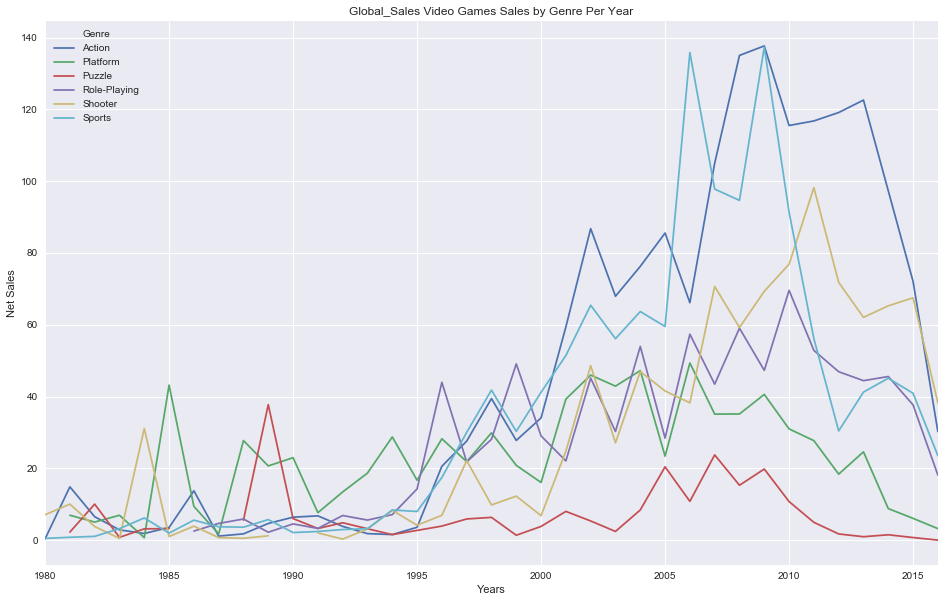

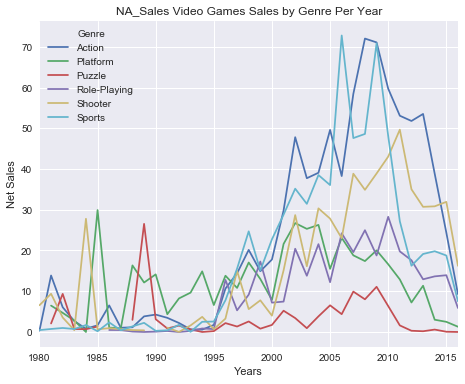

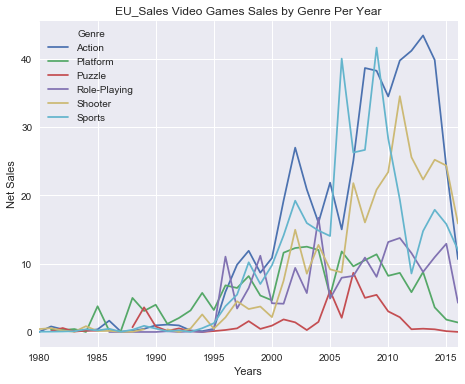

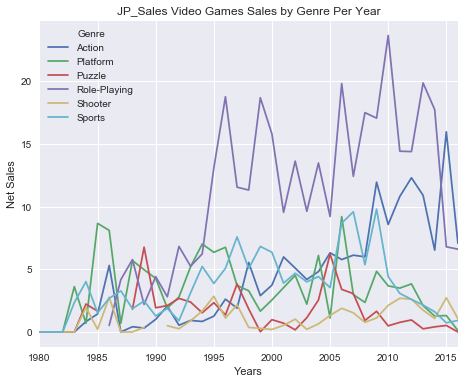

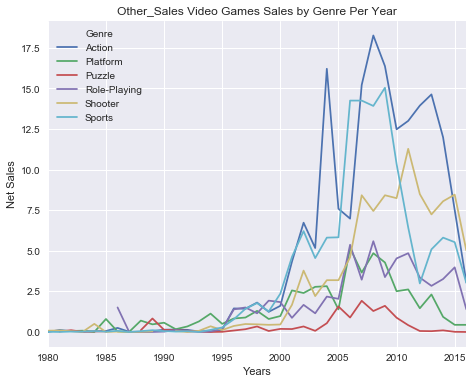

In [26]:
s=['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for i in range(0,5):
    s1 = df_vg_yr.groupby(['Genre','Year_of_Release']).agg(sum)[s[i]]
    del s1['Adventure']
    del s1['Strategy']
    del s1['Simulation']
    del s1['Fighting']
    del s1['Racing']
    del s1['Misc']
    if i>0:
        ax = s1.unstack('Genre').plot(kind = "line",figsize=(7.5,6),title=""+s[i]+" Video Games Sales by Genre Per Year")
    else:
        ax = s1.unstack('Genre').plot(kind = "line",figsize=(16,10),title=""+s[i]+" Video Games Sales by Genre Per Year")
    ax.set(xlabel="Years", ylabel="Net Sales")